<a href="https://colab.research.google.com/github/Cflemin7/python_work/blob/main/Project_Analyzing_a_Public_Dataset_%E2%80%93_Titanic_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-a2b8b85944d5>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-2-a2b8b85944d5>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

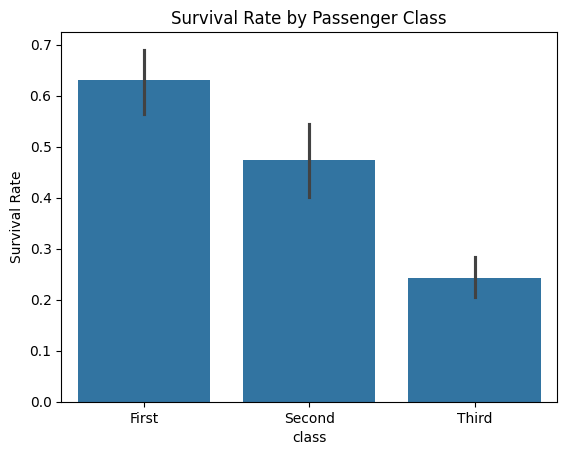

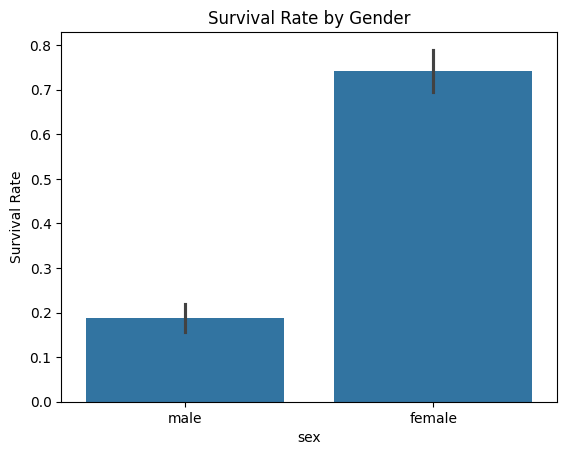

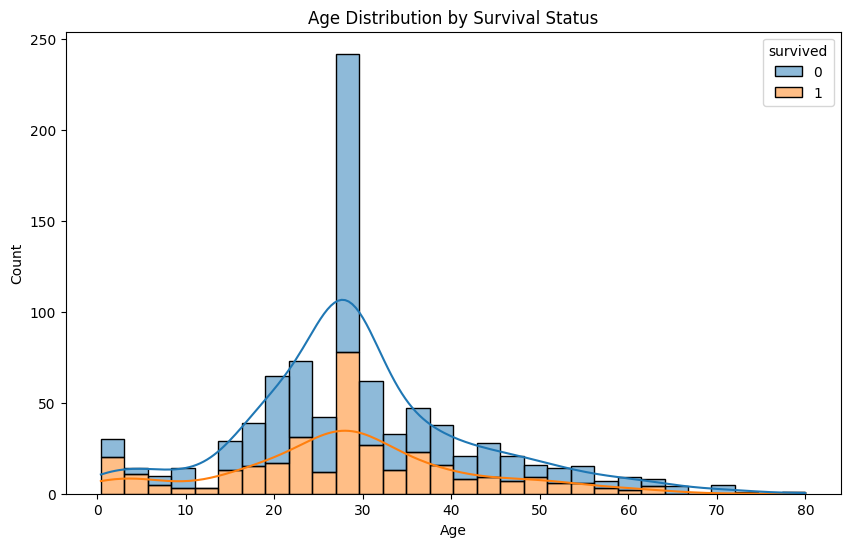

ValueError: could not convert string to float: 'male'

<Figure size 1000x800 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset directly from seaborn
titanic = sns.load_dataset('titanic')

# Display the first few rows of the dataset
titanic.head()

# Check for missing values
missing_data = titanic.isnull().sum()
missing_data[missing_data > 0]

# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill missing embarked values with mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Drop the "deck" and "embark_town" columns due to many missing values
titanic.drop(columns=['deck', 'embark_town'], inplace=True)

# Verify no more missing values
titanic.isnull().sum()

# Plot survival rate by passenger class
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Plot survival rate by gender
sns.barplot(x='sex', y='survived', data=titanic)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

# Plot age distributions for survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=True)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features and target variable
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to numeric right before using it
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic['survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
